In [2]:
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plt
from math import*

In [5]:
V = 8629.0
R = 0.4
u = 1.0
b = 1
#l = 0.0
dE=0.005

In [6]:
def k1(E,b,u,l):
	return sqrt(2.0*b*E-u*(2.0*l+1.0))

def k2(E,V,R,b,u,l):
	return sqrt(-2.0*(E-V-l-0.5-(R**2.0*(u-1.0)/2.0)))

In [9]:
def f(E,V,R,b,u,l):
	ki=k1(E,b,u,l)
	ko=k2(E,V,R,b,u,l)
	x = ki*R*(sp.jvp(l,ki*R,1)/sp.jv(l,ki*R))
	return (b/2.0)+(b*ko*R)+(R**2*(b-u)/2.0)+x

def zero(V,R,b,u,l):
	E1=(l+0.5)*(u/b) + dE
	E=E1
	while f(E,V,R,b,u,l)*f(E+dE,V,R,b,u,l)>=0.0:
		E+=dE
	return (2.0*E+dE)/2.0

In [11]:
def rho_in(r,E,b,u,l):
    ki = k1(E,b,u,l)
    return r*exp(-(u*r**2)/2.0)*sp.jv(l,ki*r)**2

def B(E,V,R,b,u,l):
    ki = k1(E,b,u,l)
    ko = k2(E,V,R,b,u,l)
    return exp(-R**2*(u-1)/4.0 + ko*R) * sqrt(R) * sp.jv(l,ki*R)

def rho_out(r,E,V,R,b,u,l):
    x = B(E,V,R,b,u,l)
    ko = k2(E,V,R,b,u,l)
    return x**2*exp(-(r**2.0 + 4.0*ko*r)/2.0)

def rho(r,E,V,R,b,u,l):
    if r < R:
        return rho_in(r,E,b,u,l)
    else:
        return rho_out(r,E,V,R,b,u,l)

In [12]:
def integral(E,V,R,b,u,l):
    p = 0.0 + 0.0005*R
    q = 1.5*R
    N = 1500
    h = (q - p)/(3000.0)
    m = rho(p,E,V,R,b,u,l) + rho(q,E,V,R,b,u,l)
    k=0.0
    for i in range(N):
        k=k+4.0*(rho(p+2.0*i*h+h,E,V,R,b,u,l))
    s=0.0
    for i in range(N-2):
        s=s+2.0*(rho(p+2.0*i*h+2.0*h,E,V,R,b,u,l))

    return h*(k+s+m)/3.0

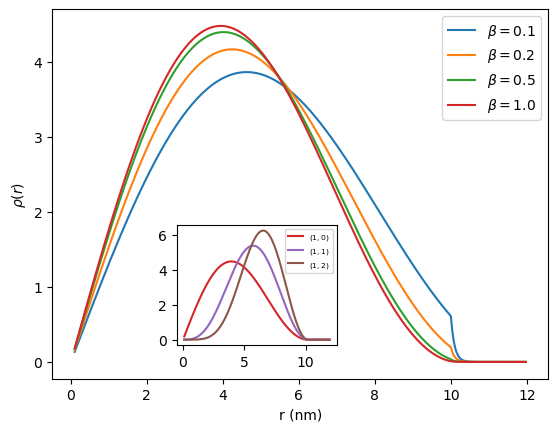

In [20]:
fig, ax2 = plt.subplots()
x_cor, y_cor, width, height = [0.32, 0.18, 0.25, 0.25]
ax1 = fig.add_axes([x_cor, y_cor, width, height])
r_list = np.arange(0.0+R/100.0,1.2*R,R/300.0)
r_list_2 = [25.0*r for r in r_list]

E_list=[zero(V,R,b,u,0.0),zero(V,R,b,u,1.0),zero(V,R,b,u,2.0)]
y=[]
for l in [0,1,2]:
    z=[]
    k = integral(E_list[l],V,R,b,u,l)
    for r in r_list:
        z.append(rho(r,E_list[l],V,R,b,u,l)/k)
    y.append(z)
ax1.plot(r_list_2,y[0],'#d62728',label=r'$(1,0)$')
ax1.plot(r_list_2,y[1],'#9467bd',label=r'$(1,1)$')
ax1.plot(r_list_2,y[2],'#8c564b',label=r'$(1,2)$')
ax1.legend(prop={'size': 5.5})

E_list_2=[zero(V,R,0.1,u,0.0),zero(V,R,0.2,u,0.0),zero(V,R,0.5,u,0.0),zero(V,R,1.0,u,0.0)]
w=[]
b_list=[0.1,0.2,0.5,1.0]
for i in [0,1,2,3]:
    z=[]
    k = integral(E_list_2[i],V,R,b_list[i],u,0.0)
    for r in r_list:
        z.append(rho(r,E_list_2[i],V,R,b_list[i],u,0.0)/k)
    w.append(z)
    ax2.plot(r_list_2, w[i], label=r'$\beta = %s$' %b_list[i])
ax2.set_ylabel(r'$\rho(r)$')
ax2.set_xlabel('r (nm)')
ax2.legend()

plt.show()